## Step 1: Dataset Selection
This dateset is from kaggle: https://www.kaggle.com/datasets/fahadrehman07/retail-transaction-dataset/download?datasetVersionNumber=1

### About the dataset
This comprehensive dataset captures the essence of transactions within a retail environment. Featuring ten essential columns, including CustomerID, ProductID, Quantity, Price, TransactionDate, PaymentMethod, StoreLocation, ProductCategory, DiscountApplied(%), and TotalAmount, this dataset encapsulates crucial information for retail analytics. Each entry provides a glimpse into the intricate interactions between customers, products, and sales channels, facilitating the exploration of purchasing patterns, popular products, pricing strategies, and regional preferences.
By delving into the wealth of information contained within this dataset, analysts can uncover valuable insights to drive strategic decision-making. The TransactionDate column offers a temporal dimension, allowing for the identification of seasonal trends, peak purchasing periods, and the impact of marketing campaigns over time. PaymentMethod data sheds light on evolving consumer payment preferences and the effectiveness of different payment strategies. Moreover, the DiscountApplied(%) column provides insights into consumer responsiveness to promotions and discounts, enabling retailers to optimize their pricing strategies for maximum impact. With such rich and diverse data at their disposal, businesses can refine their marketing efforts, enhance customer experiences, and ultimately, thrive in today's competitive retail landscape.

##### The dataset consist of 100000 rows and 10 columns


## Step 2: Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"C:\Users\Wexki\Downloads\Retail_Transaction_Dataset.csv")

In [3]:
dataset.tail()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
99995,726461,A,2,56.078258,7/17/2023 16:59,Credit Card,"3632 Darren Station Apt. 553\nEricaborough, RI...",Clothing,18.345145,91.581240
99996,328056,A,6,88.516406,5/30/2023 9:04,Credit Card,"821 Taylor Shoals\nEvansville, IL 70845",Electronics,3.995541,509.878179
99997,887304,B,4,72.385564,8/25/2023 7:59,Credit Card,"50653 Kara Lakes\nStephanieborough, RI 94492",Clothing,17.423979,239.092472
99998,326401,C,5,66.542239,2/5/2024 19:45,PayPal,"18756 Mcfarland Way Suite 866\nBarnettside, PR...",Electronics,14.345018,284.983717
99999,771566,C,5,38.087766,2/4/2024 11:53,Debit Card,"8046 Hull Drive\nPaulstad, GU 87218",Home Decor,2.966058,184.790305


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB


In [5]:
dataset.isnull().sum()

CustomerID            0
ProductID             0
Quantity              0
Price                 0
TransactionDate       0
PaymentMethod         0
StoreLocation         0
ProductCategory       0
DiscountApplied(%)    0
TotalAmount           0
dtype: int64

In [6]:
dataset.shape

(100000, 10)

In [7]:
dataset.describe()

,CustomerID,Quantity,Price,DiscountApplied(%),TotalAmount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,500463.982180,5.009290,55.067344,10.020155,248.334955
std,288460.917524,2.579808,25.971567,5.779534,184.554792
min,14.000000,1.000000,10.000430,0.000046,8.274825
25%,250693.750000,3.000000,32.549474,5.001013,95.163418
50%,499679.000000,5.000000,55.116789,10.030353,200.368393
75%,751104.750000,7.000000,77.456763,15.018367,362.009980
max,999997.000000,9.000000,99.999284,19.999585,896.141242


In [8]:
dataset["Price"] = dataset["Price"].astype("int")
dataset["DiscountApplied(%)"] = dataset["DiscountApplied(%)"].astype("int")
dataset["TotalAmount"] = dataset["TotalAmount"].astype("int")

In [9]:
dataset['time'] = pd.to_datetime(dataset.TransactionDate).dt.time

In [10]:
year = pd.to_datetime(dataset.TransactionDate).dt.year
dataset.insert(5, 'year' , year)

In [11]:
month_name = pd.to_datetime(dataset.TransactionDate).dt.month_name()
month = pd.to_datetime(dataset.TransactionDate).dt.month
dataset.insert(5, 'month' , month)
dataset.insert(5, 'monthname' , month_name)

In [12]:
dataset = dataset.drop(columns = ['StoreLocation'])

## Data Exploration Summary

##### 1. No missing values were identified.
##### 2. StoreLocation column is of no use in these anaysis so it was dropped
##### 3. converting price, TotalAmount, DiscountApplied(%) columns in the dataset to integer data type in other to perform mathematical operations,             improving computational efficiency, or ensuring consistency in data type across the dataset
##### 4. converts the 'TransactionDate' column in a pandas DataFrame (dataset) to datetime format and then extracts the time component, assigning it            to a new column named 'time'
##### 5. converts the Transaction Date column in the dataset to datetime objects, extracts the year component from each datetime object, and adds a             new column named year to the dataset containing these extracted year values

In [13]:
dataset.head(2)

,CustomerID,ProductID,Quantity,Price,TransactionDate,monthname,month,year,PaymentMethod,ProductCategory,DiscountApplied(%),TotalAmount,time
0,109318,C,7,80,12/26/2023 12:32,December,12,2023,Cash,Books,18,455,12:32:00
1,993229,C,4,75,8/5/2023 0:00,August,8,2023,Cash,Home Decor,14,258,00:00:00


In [14]:
def categorical_valcount_hist(feature):
    
    fig, ax = plt.subplots( figsize = (6,6) )
    sns.countplot(x=feature, ax=ax, data=dataset)
    plt.show()

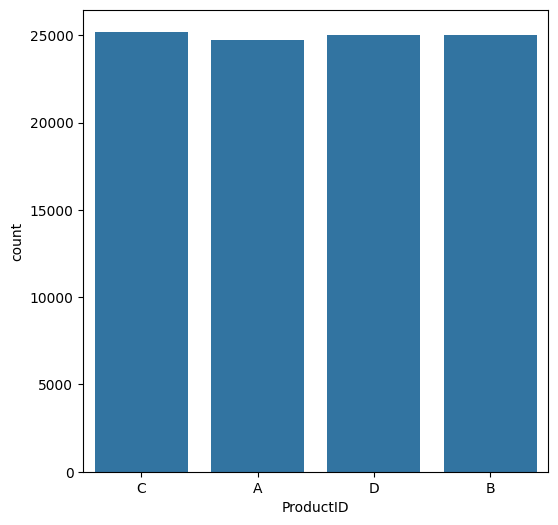

ProductID
C    25209
D    25042
B    24997
A    24752
Name: count, dtype: int64

In [74]:
dataset.groupby('ProductID').ProductID.count()

categorical_valcount_hist("ProductID")
dataset['ProductID'].value_counts()

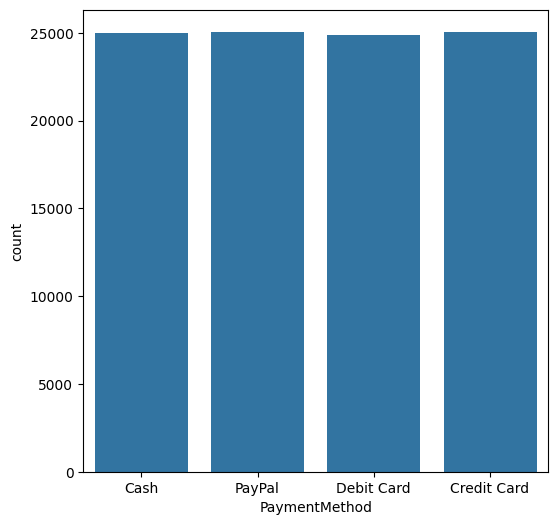

PaymentMethod
PayPal         25067
Credit Card    25034
Cash           25008
Debit Card     24891
Name: count, dtype: int64

In [75]:
dataset.groupby('PaymentMethod').PaymentMethod.count()

categorical_valcount_hist("PaymentMethod")
dataset['PaymentMethod'].value_counts()

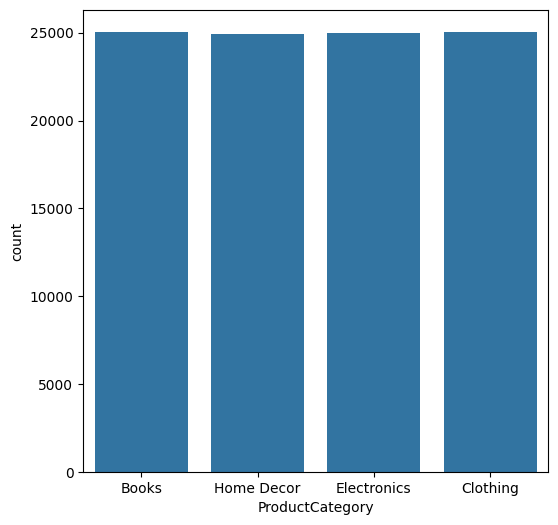

ProductCategory
Clothing       25056
Books          25031
Electronics    24990
Home Decor     24923
Name: count, dtype: int64

In [76]:
dataset.groupby('ProductCategory').ProductCategory.count()

categorical_valcount_hist("ProductCategory")
dataset['ProductCategory'].value_counts()

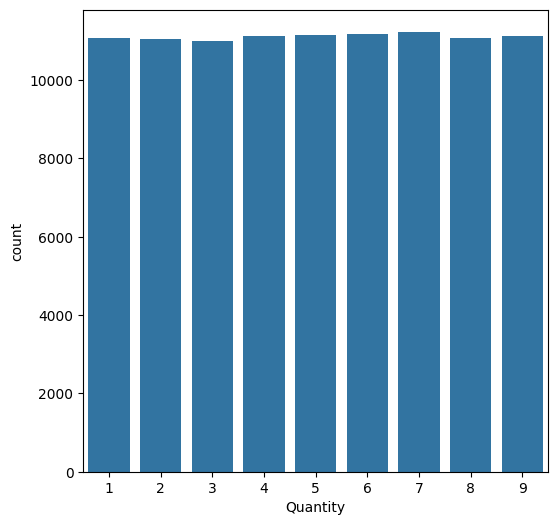

Quantity
7    11236
6    11166
5    11146
9    11136
4    11135
8    11083
1    11064
2    11043
3    10991
Name: count, dtype: int64

In [73]:
dataset.groupby('Quantity').Quantity.count()

categorical_valcount_hist("Quantity")
dataset['Quantity'].value_counts()

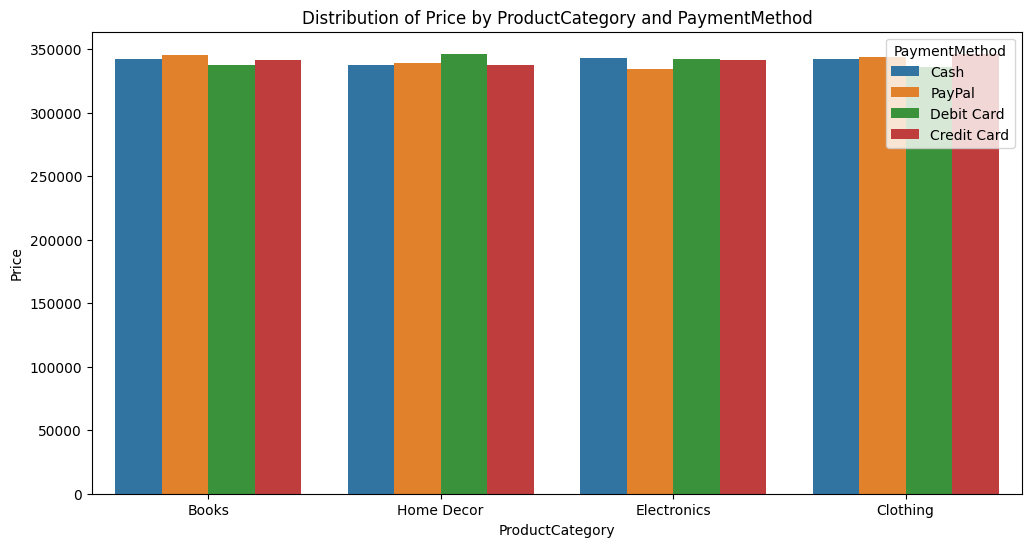

The above plot illustrates the distribution of prices across different product categories and payment methods.


In [17]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="ProductCategory", y="Price", data=dataset, hue="PaymentMethod", estimator=sum, errorbar=None)
plt.title("Distribution of Price by ProductCategory and PaymentMethod")
plt.legend(title="PaymentMethod", loc="upper right")

plt.show()

print("The above plot illustrates the distribution of prices across different product categories and payment methods.")

In [93]:
ProductCategory_total = dataset.groupby(["ProductCategory"],as_index=False)["TotalAmount"].sum().sort_values(by="TotalAmount", ascending=False)
ProductCategory_total

,ProductCategory,TotalAmount
0,Books,6245388
1,Clothing,6192996
2,Electronics,6184191
3,Home Decor,6161063


In [92]:
PaymentMethod_total = dataset.groupby(["PaymentMethod"],as_index=False)["TotalAmount"].sum().sort_values(by="TotalAmount", ascending=False)
PaymentMethod_total

,PaymentMethod,TotalAmount
3,PayPal,6207269
0,Cash,6194739
1,Credit Card,6191041
2,Debit Card,6190589


In [95]:
ProductCategory_mean = dataset.groupby(["ProductCategory"]).agg({"Quantity":"mean","DiscountApplied(%)":"mean"})
ProductCategory_mean


,Quantity,DiscountApplied(%)
ProductCategory,,
Books,5.035636,9.496704
Clothing,4.990581,9.519397
Electronics,5.015886,9.483794
Home Decor,4.995025,9.581952


In [111]:
monthly_itemcont = (
    dataset.groupby(['year','month','monthname','ProductCategory'] , as_index = False)
    .agg({'Quantity':'sum'})
    .sort_values(['year','month','ProductCategory'] , ascending = [True,True,False])
)
monthly_itemcont.head(2)

,year,month,monthname,ProductCategory,Quantity
3,2023,4,April,Home Decor,278
2,2023,4,April,Electronics,327


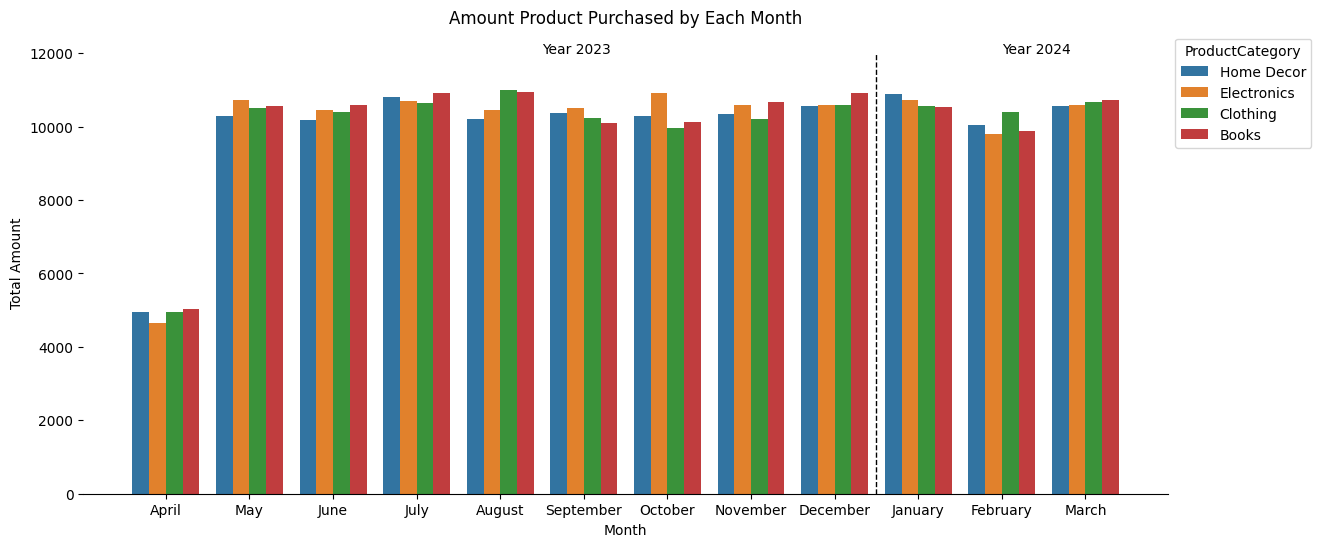

In [117]:
plt.figure(figsize=(14, 6))
sns.barplot(
    data = monthly_itemcont
    ,x = 'monthname'
    ,y = 'Quantity'
    ,hue = 'ProductCategory'
    ,errorbar = None
)


plt.gca().spines[['top','right','left']].set_visible(False)
plt.legend(bbox_to_anchor=(1, 1) , title = 'ProductCategory')

plt.ylabel('Total Amount')
plt.xlabel('Month')
plt.title('Amount Product Purchased by Each Month')

#plt.ylim([0,2500])

plt.vlines(x=8.5, ymin=0, ymax=monthly_itemcont.Quantity.max() + 1000 ,  colors='k', ls='--', lw=1, label='vline_single - partial height')
plt.text(4.5, monthly_itemcont.Quantity.max() + 1000 , 'Year 2023', horizontalalignment='left', size='medium', color='black')
plt.text(10, monthly_itemcont.Quantity.max() + 1000, 'Year 2024', horizontalalignment='left', size='medium', color='black')
plt.show()

In [122]:
monthly_trnxamount = (
    dataset.groupby(['year','month','monthname'] , as_index = False)
    .agg({'TotalAmount':'sum'})
    .sort_values(['year','month'] , ascending = [True,True])
)


monthly_trnxamount.TotalAmount = round(monthly_trnxamount.TotalAmount / 1000000,2)
monthly_trnxamount

,year,month,monthname,TotalAmount
0,2023,4,April,0.06
1,2023,5,May,2.10
2,2023,6,June,2.06
3,2023,7,July,2.13
4,2023,8,August,2.11
5,2023,9,September,2.05
6,2023,10,October,2.05
7,2023,11,November,2.05
8,2023,12,December,2.12
9,2024,1,January,2.12


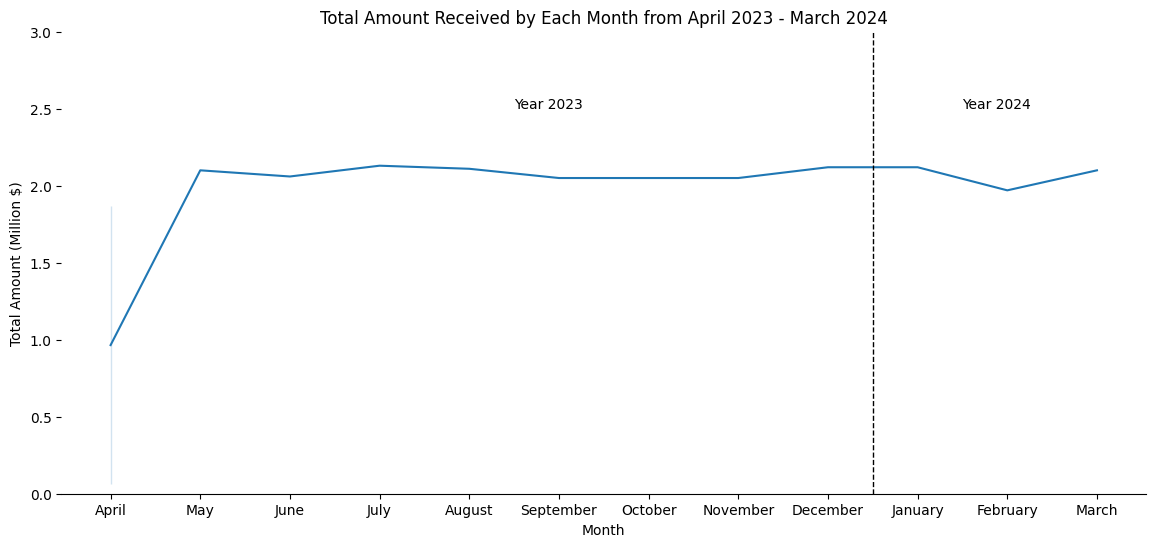

In [127]:
plt.figure(figsize=(14, 6))
sns.lineplot(
    data = monthly_trnxamount
    ,x = 'monthname'
    ,y = 'TotalAmount'
)


plt.title('Total Amount Received by Each Month from April 2023 - March 2024')
plt.ylabel('Total Amount (Million $)')
plt.xlabel('Month')
plt.ylim([0, 3.0])

plt.vlines(x=8.5, ymin=0, ymax=3.0 ,  colors='k', ls='--', lw=1, label='vline_single - partial height')
plt.text(4.5, 2.5 , 'Year 2023', horizontalalignment='left', size='medium', color='black')
plt.text(9.5, 2.5 , 'Year 2024', horizontalalignment='left', size='medium', color='black')

plt.gca().spines[['top','right','left']].set_visible(False)

plt.show()


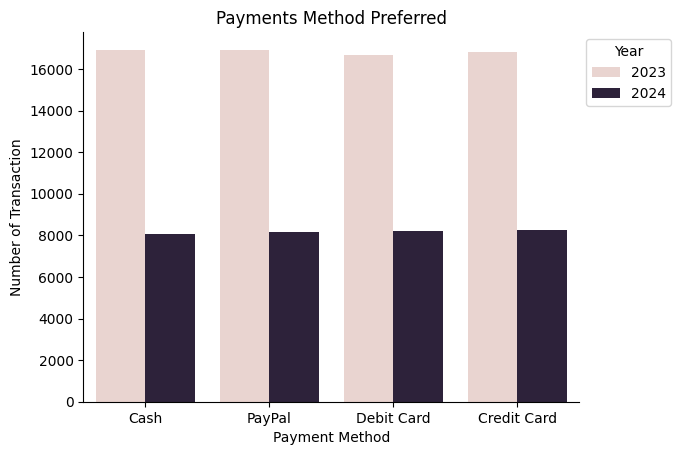

In [129]:
sns.countplot(
    data = dataset
    ,x = 'PaymentMethod'
    ,hue = 'year'
)


plt.gca().spines[['top','right']].set_visible(False)
plt.title('Payments Method Preferred')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transaction')

plt.legend(bbox_to_anchor=(1, 1) , title = 'Year')

plt.show()